In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-1.1.2-py3-none-any.whl.metadata (2.3 kB)
Using cached geopandas-1.1.2-py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 1.0/22.9 MB 6.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/22.9 MB 4.8 MB/s eta 0:00:05
   ---- ----------------------------------- 2.6/22.9 MB 4.5 MB/s eta 0:00:05
   ----- ---------------------------------- 3.1/22.9 MB 4.4 MB/s eta 0:00:05
   ------- -------------------------------- 4.2/22.9 MB 4.2 MB/s eta 0:00:05
   -------- ------------------------------- 5.0/22.9 MB 4.1 MB/s eta 0:00:05
   ---------- ----------------------------- 5.8/22.9 MB 4.1 MB/s eta 0:00:05
   ----------- ---------------------------- 6.8/22.9 MB 4.1 MB/s eta 0:00:04
   ------------- -------------------------- 7.6/22.9 MB 4.0 MB/s eta 0:00:04
   -------------- --------------------

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

In [3]:
df = pd.read_csv("../data/processed/train_clean.csv")

### Price vs Location (Heatmap Intuition)

In [4]:
geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

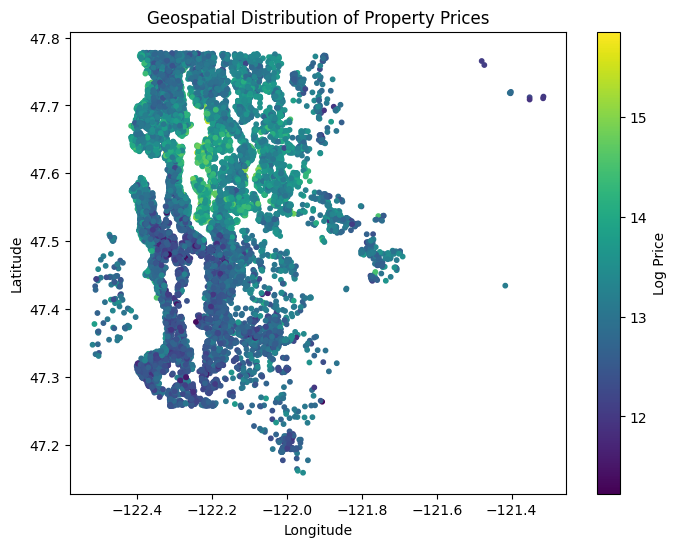

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(
    gdf["long"],
    gdf["lat"],
    c=np.log1p(gdf["price"]),
    cmap="viridis",
    s=10
)
plt.colorbar(label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Property Prices")
plt.show()

Property prices exhibit strong spatial clustering, indicating that location and surrounding context play a significant role in valuation.

### Waterfront vs Non-Waterfront

In [6]:
df.groupby('waterfront')['price'].mean()

waterfront
0    5.300675e+05
1    1.591938e+06
Name: price, dtype: float64

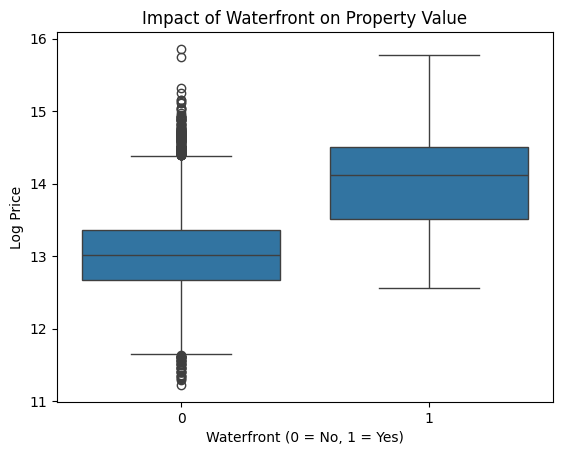

In [7]:
sns.boxplot(
    x="waterfront",
    y=np.log1p(df["price"]),
    data=df
)
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Log Price")
plt.title("Impact of Waterfront on Property Value")
plt.show()

### Neighborhood Density Effect

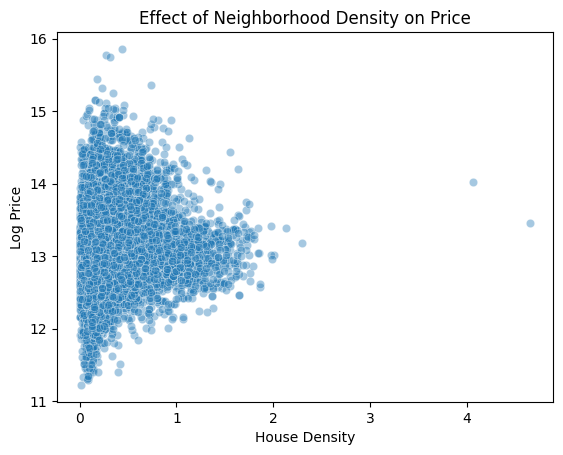

In [8]:
df["house_density"] = df["sqft_living"] / df["sqft_lot"]

sns.scatterplot(
    data=df,
    x="house_density",
    y=np.log1p(df["price"]),
    alpha=0.4
)
plt.xlabel("House Density")
plt.ylabel("Log Price")
plt.title("Effect of Neighborhood Density on Price")
plt.show()

## Manual Satellite Image Inspection

In [9]:
df[['id', 'lat', 'long', 'price']].sample(5)

,id,lat,long,price
8212,1099600220,47.3027,-122.376,185000
16000,6902000100,47.6525,-122.087,500000
9722,2787311190,47.4093,-122.173,252500
8086,5700000120,47.5824,-122.293,780000
262,3904930240,47.5737,-122.018,485000


The above data is basically used for manually inspecting the satellite image for which we used Google Maps Satellite View for particular latitudes and longitudes.